In [1]:
#cambiar el directorio de google colab a google drive
from google.colab import drive
drive.mount('/content/drive')
#cambiar el directorio de trabajo actual
import os
os.chdir('/content/drive/My Drive/INF_354/dataset_examen1')
!pwd


Mounted at /content/drive
/content/drive/My Drive/INF_354/dataset_examen1


## **1. Seleccione un dataset de su interés (de cualquier repositorio, que contenga datos tabulares mínimo de 1500 filas y al menos 10 columnas). Realice lo siguiente:**

In [2]:
import pandas as pd
import numpy as np
#lectura de datos por categoria
datos=pd.read_csv("dataset_actHum.csv")
datos.head(100)
#datos.sample(n=10)

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s),Activity
0,6.649,9.323,-0.766,5.723,7.963,-0.081,-0.186,0.781,1.708,-0.963,-1.250,-0.409,Swimming
1,5.018,8.878,-0.804,6.558,7.280,-0.410,-1.328,1.402,-0.674,-0.166,-1.349,0.866,Swimming
2,7.204,5.811,-3.086,7.841,5.331,-2.503,-0.669,0.664,-0.313,0.856,-0.872,0.882,Swimming
3,9.567,4.444,-6.024,8.223,3.252,-4.240,2.216,2.354,-0.060,-0.173,-0.217,0.448,Swimming
4,10.290,5.035,-3.704,8.546,4.106,-2.504,1.744,0.929,-1.200,-0.357,-0.199,-0.026,Swimming
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-5.665,4.973,-7.235,-2.343,6.898,-6.565,-3.321,-1.926,-0.671,-0.205,1.233,2.569,Swimming
96,-5.665,4.973,-7.235,-2.343,6.898,-6.565,-3.321,-1.926,-0.671,-0.205,1.233,2.569,Swimming
97,-5.665,4.973,-7.235,-2.343,6.898,-6.565,-3.321,-1.926,-0.671,-0.205,1.233,2.569,Swimming
98,-2.150,4.982,-5.528,1.052,8.461,-4.845,-3.202,-3.479,-0.683,-1.479,5.175,0.622,Swimming


# **a. El cálculo de la media, moda, cuartiles de datos y de percentiles por columna; explique qué significa en cada caso mediante Python sin uso de librerías**

In [3]:
import numpy as np
import math
datos_num=datos[['ACCELEROMETER X (m/s²)','ACCELEROMETER Y (m/s²)','ACCELEROMETER Z (m/s²)','GRAVITY X (m/s²)','GRAVITY Y (m/s²)','GRAVITY Z (m/s²)','LINEAR ACCELERATION X (m/s²)','LINEAR ACCELERATION Y (m/s²)','LINEAR ACCELERATION Z (m/s²)','GYROSCOPE X (rad/s)','GYROSCOPE Y (rad/s)','GYROSCOPE Z (rad/s)']]
matriz=np.array(datos_num)
n=len(matriz)
medias=[]
medianas=[]
modas=[]
quartiles=[]
percentiles=[]
for c in range(12):
  columna=[fila[c] for fila in matriz]
  #media
  medias.append(sum(columna)/n)
  #mediana
  columna.sort()
  if(n%2==0):
    medianas.append((columna[n//2]+columna[n//2 - 1])/2)
  else:
    medianas.append(columna[(n-1)//2])
  #moda
  modaCol=[]
  frecModa=0
  frec=0;
  for i in range(n):
    if(i+1==n or columna[i]!=columna[i+1]):
      frec+=1
      if(frec>frecModa):
        frecModa=frec
        modaCol.clear()
        modaCol.append(columna[i])
      else:
        if(frec==frecModa):
          modaCol.append(columna[i])
      frec=0
    else:
      frec+=1
  modas.append(modaCol)
  #quartiles
  q=[]
  for i in range(3):  
    x=(i+1)/4*(n+1)
    parte_entera=int(x)
    parte_decimal=abs(x)-abs(int(x))
    if(parte_decimal>0):
      q1=columna[parte_entera-1]+(parte_decimal*(columna[parte_entera]-columna[parte_entera-1]))
    else:
      q1=columna[parte_entera-1]
    q.append(q1)
  quartiles.append(q)
  #percentiles
  p85=math.ceil((85*n)/100)
  percentiles.append(columna[p85-1])
print("RESULTADOS")
print("Mediana indica el valor promedio de mediciones tomadas en cuanto aceleracion en los 3 ejes, en otros atributos")  
print("medias: ",medias,"\n")
print("medianas indica el valor que se ubica al centro de mediciones tomadas en cuanto aceleracion en los 3 ejes, en otros atributos")
print("medianas: ",medianas,"\n")
print("modas indica el valor mas frecuente de mediciones tomadas en cuanto aceleracion en los 3 ejes, en otros atributos")
print("modas: ",modas,"\n")
print("quartiles dividen a la distribución en cuatro partes iguales indicadon el valor de mediciones en esos puntos ")
print("quartiles: ",quartiles,"\n")
print("quartiles cuando dividen a la distribución en 100 partes indicadon el valor de mediciones en esos puntos ")
print("percentiles: ",percentiles,"\n")


RESULTADOS
Mediana indica el valor promedio de mediciones tomadas en cuanto aceleracion en los 3 ejes, en otros atributos
medias:  [-4.207477344181934, -1.9530865286884267, -3.201309518919271, -4.0542187534562695, -1.4668283224056793, -3.2546368538854145, -0.08562043078705321, -0.13990136398345995, 0.03286873634041538, -0.0007888274481924034, -0.006848434578824236, -0.015612094162256257] 

medianas indica el valor que se ubica al centro de mediciones tomadas en cuanto aceleracion en los 3 ejes, en otros atributos
medianas:  [-5.1413, -0.668, -3.802, -4.814, -0.764, -3.7352, -0.014, 0.0, -0.005, 0.001, 0.001, 0.001] 

modas indica el valor mas frecuente de mediciones tomadas en cuanto aceleracion en los 3 ejes, en otros atributos
modas:  [[-8.985], [-0.254], [-4.025], [-8.919], [-0.247], [-4.07], [0.0], [0.0], [0.0], [0.002], [0.001], [0.001]] 

quartiles dividen a la distribución en cuatro partes iguales indicadon el valor de mediciones en esos puntos 
quartiles:  [[-8.566, -5.1413, -0

## **b.Realice lo mismo del inciso (a) con el uso de numpy y pandas**

In [9]:

#media
medias_np=np.mean(matriz,axis=0)
#mediana
medianas_np=np.median(matriz,axis=0)
#modas
modas_np=[]
for i in range(12):
  columna=[fila[i] for fila in matriz]
  val,frec=np.unique(columna, return_counts=True)
  modas_np.append(val[frec==np.max(frec)])
#cuartiles
quartiles_np=np.quantile(matriz,(1/4),axis=0)
#percentiles
percentiles_np=np.percentile(matriz,85,axis=0)

print("medias: ", medias_np,"\n")
print("medianas: ",medianas_np,"\n")
print("modas: ",modas_np,"\n")
print("quartiles: ",quartiles_np,"\n")
print("percentiles: ",percentiles_np,"\n")

# calcular media
media = datos_num.mean().mean()
print("Media total:", media)

# calcular moda
moda = datos_num.mode().iloc[0]
print("Moda total:", moda)

# calcular cuartiles
cuartiles = datos_num.quantile(q=[0.25, 0.5, 0.75])
print("Cuartiles totales:\n", cuartiles)

# calcular percentiles
percentiles = datos_num.quantile(q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print("Percentiles totales:\n", percentiles)

medias:  [-4.20747734e+00 -1.95308653e+00 -3.20130952e+00 -4.05421875e+00
 -1.46682832e+00 -3.25463685e+00 -8.56204308e-02 -1.39901364e-01
  3.28687363e-02 -7.88827448e-04 -6.84843458e-03 -1.56120942e-02] 

medianas:  [-5.1413e+00 -6.6800e-01 -3.8020e+00 -4.8140e+00 -7.6400e-01 -3.7352e+00
 -1.4000e-02  0.0000e+00 -5.0000e-03  1.0000e-03  1.0000e-03  1.0000e-03] 

modas:  [array([-8.985]), array([-0.254]), array([-4.025]), array([-8.919]), array([-0.247]), array([-4.07]), array([0.]), array([0.]), array([0.]), array([0.002]), array([0.001]), array([0.001])] 

quartiles:  [-8.566  -6.3805 -5.337  -8.39   -7.1492 -5.236  -0.08   -0.048  -0.089
 -0.0495 -0.0837 -0.05  ] 

percentiles:  [1.441   4.484   0.6179  1.238   4.307   0.1556  0.35388 0.332   0.29154
 0.4591  0.43296 0.46242] 

Media total: -1.529454978013008
Moda total: ACCELEROMETER X (m/s²)         -8.985
ACCELEROMETER Y (m/s²)         -0.254
ACCELEROMETER Z (m/s²)         -4.025
GRAVITY X (m/s²)               -8.919
GRAVITY Y (

** C. Grafique los datos y explique su comportamiento (PYTHON)**

Se puede visualizar la dispercion de datos de aceleracion en cuanto al eje x,y,z, asi tambien el rango de datos conrrespondiente a cada actividad de esa manera tambien se puede observa ciera simitlitud en las diferentes actividades


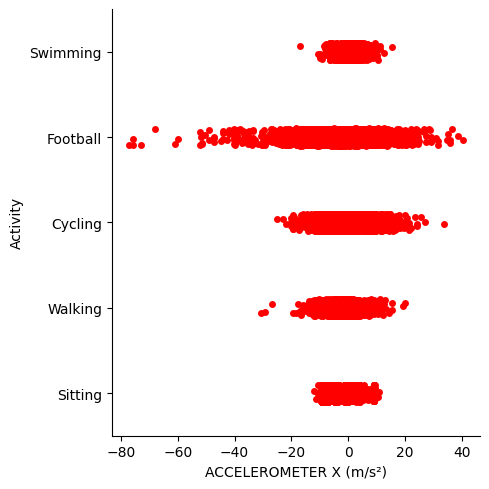

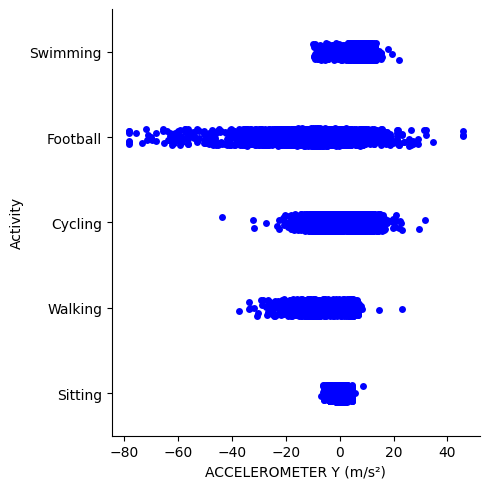

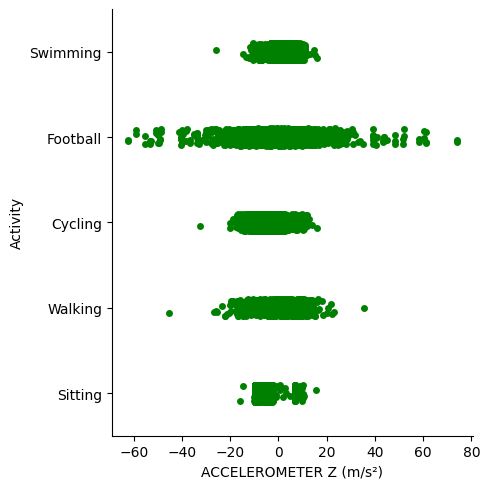

Se puede visualizar la dispercion de datos que Indican la fuerza de gravedad en el eje z,y,z, asi tambien el rango de datos correspondiente a cada actividad de esa manera tambien se puede observa variaciones en las diferentes actividades


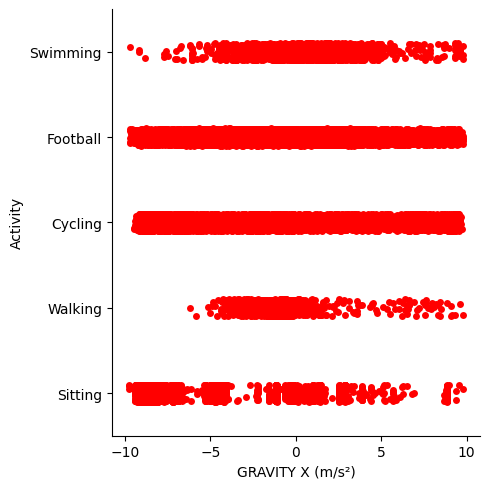

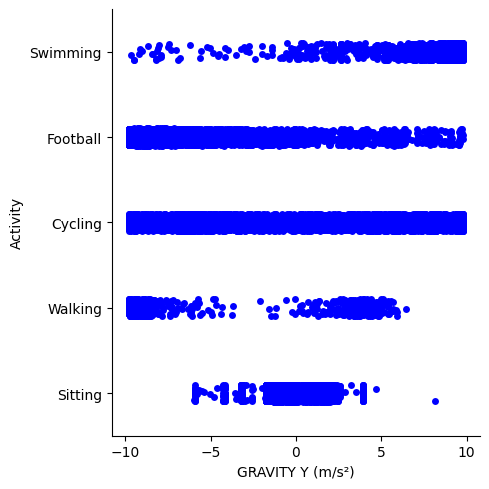

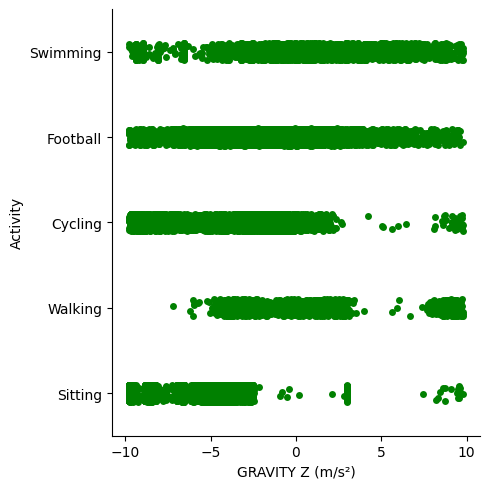

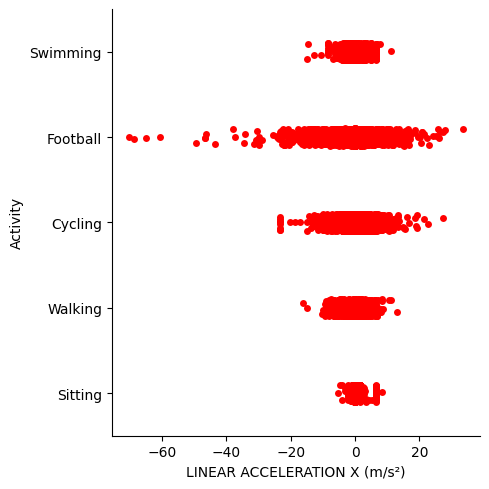

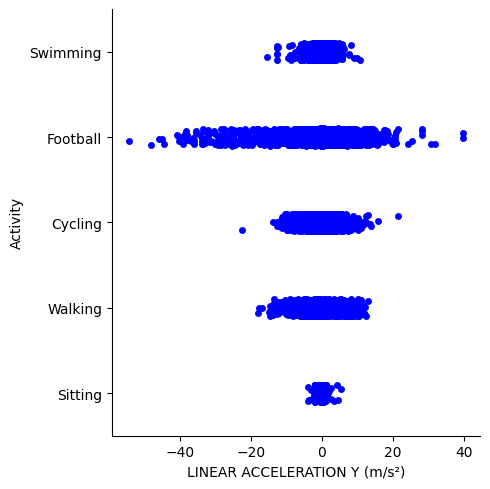

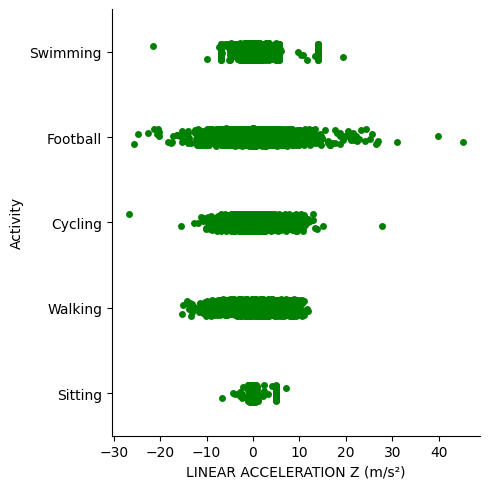

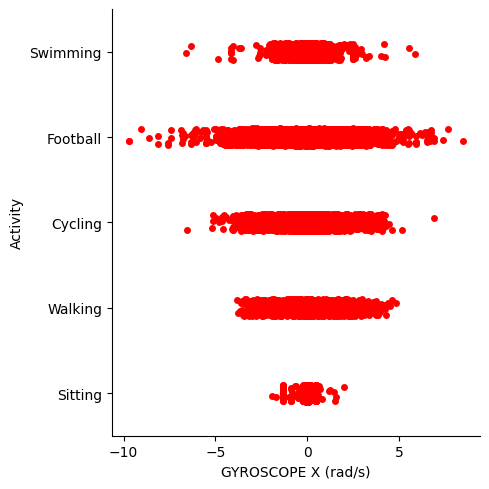

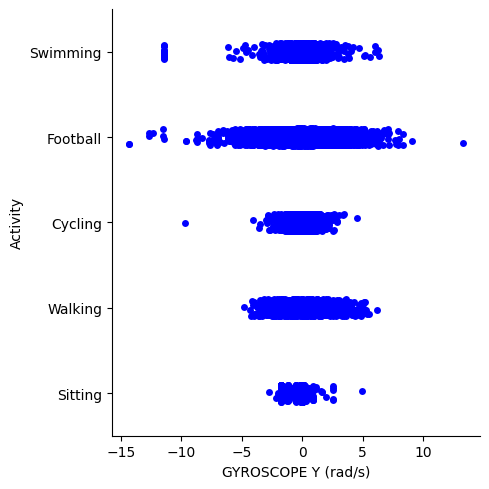

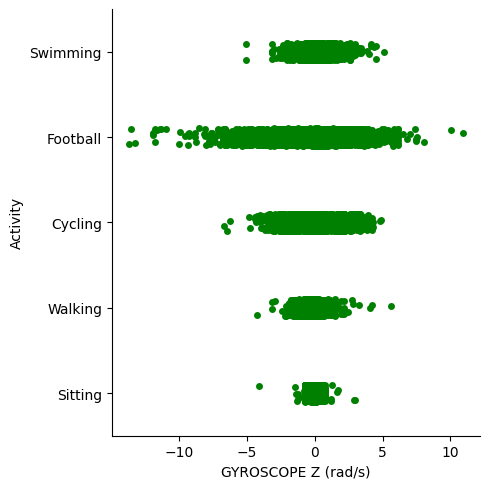

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df=datos[['ACCELEROMETER X (m/s²)','ACCELEROMETER Y (m/s²)','ACCELEROMETER Z (m/s²)','GRAVITY X (m/s²)','GRAVITY Y (m/s²)','GRAVITY Z (m/s²)','LINEAR ACCELERATION X (m/s²)','LINEAR ACCELERATION Y (m/s²)','LINEAR ACCELERATION Z (m/s²)','GYROSCOPE X (rad/s)','GYROSCOPE Y (rad/s)','GYROSCOPE Z (rad/s)','Activity']]
#Actividades con relacion al acelerometros en us 3 ejes
print("Se puede visualizar la dispercion de datos de aceleracion en cuanto al eje x,y,z, asi tambien el rango de datos conrrespondiente a cada actividad de esa manera tambien se puede observa ciera simitlitud en las diferentes actividades")
sns.catplot(x='ACCELEROMETER X (m/s²)',y='Activity',data=datos, color="red")
sns.catplot(x='ACCELEROMETER Y (m/s²)',y='Activity',data=datos, color="blue")
sns.catplot(x='ACCELEROMETER Z (m/s²)',y='Activity',data=datos, color="green")
plt.show()
#Actividades con relacion al sensor gravitatorio en us 3 ejes
print("Se puede visualizar la dispercion de datos que Indican la fuerza de gravedad en el eje z,y,z, asi tambien el rango de datos correspondiente a cada actividad de esa manera tambien se puede observa variaciones en las diferentes actividades")
sns.catplot(x='GRAVITY X (m/s²)',y='Activity',data=datos, color="red")
sns.catplot(x='GRAVITY Y (m/s²)',y='Activity',data=datos, color="blue")
sns.catplot(x='GRAVITY Z (m/s²)',y='Activity',data=datos, color="green")

#Actividades con relacion al sensor gravitatorio en us 3 ejes
sns.catplot(x='LINEAR ACCELERATION X (m/s²)',y='Activity',data=datos, color="red")
sns.catplot(x='LINEAR ACCELERATION Y (m/s²)',y='Activity',data=datos, color="blue")
sns.catplot(x='LINEAR ACCELERATION Z (m/s²)',y='Activity',data=datos, color="green")

#Actividades con relacion al sensor gravitatorio en us 3 ejes
sns.catplot(x='GYROSCOPE X (rad/s)',y='Activity',data=datos, color="red")
sns.catplot(x='GYROSCOPE Y (rad/s)',y='Activity',data=datos, color="blue")
sns.catplot(x='GYROSCOPE Z (rad/s)',y='Activity',data=datos, color="green")
plt.show()
